## Importing Modules


In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

seed = 7
numpy.random.seed(seed)


Using TensorFlow backend.


### Bring in Data, check the data

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


11493376/11490434 [==============================] - 9s 1us/step


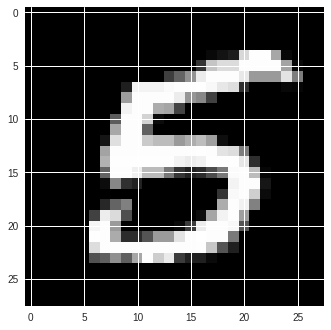

5


In [0]:


plt.imshow(X_train[20000], cmap=plt.get_cmap('gray'))
plt.show()
print(Y_train[20000])





## Perform required preprocessing, and make it ready for machine learning algorithim.

In [0]:
num_of_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_of_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_of_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255




In [0]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]




## Create the network 

In [0]:

my_model = Sequential()
my_model.add(Dense(10, input_dim=num_of_pixels, activation='relu'))
my_model.add(Dense(num_classes, activation='softmax'))


## Configure and compile the network

In [0]:
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



## Train the network

In [0]:
my_model.fit(X_train, Y_train, epochs=10, batch_size=100, verbose=2)




Epoch 1/10
 - 3s - loss: 0.6698 - acc: 0.8160
Epoch 2/10
 - 3s - loss: 0.3255 - acc: 0.9080
Epoch 3/10
 - 3s - loss: 0.2909 - acc: 0.9192
Epoch 4/10
 - 3s - loss: 0.2736 - acc: 0.9235
Epoch 5/10
 - 3s - loss: 0.2619 - acc: 0.9270
Epoch 6/10
 - 3s - loss: 0.2542 - acc: 0.9296
Epoch 7/10
 - 3s - loss: 0.2475 - acc: 0.9315
Epoch 8/10
 - 3s - loss: 0.2415 - acc: 0.9328
Epoch 9/10
 - 3s - loss: 0.2362 - acc: 0.9345
Epoch 10/10
 - 3s - loss: 0.2327 - acc: 0.9347


## Evaluate the performance (test your hypothesis)

In [0]:
scores = my_model.evaluate(X_test, Y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Error: 6.92%
